In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh') 

In [4]:
df=pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [5]:
df.shape

(1007, 7)

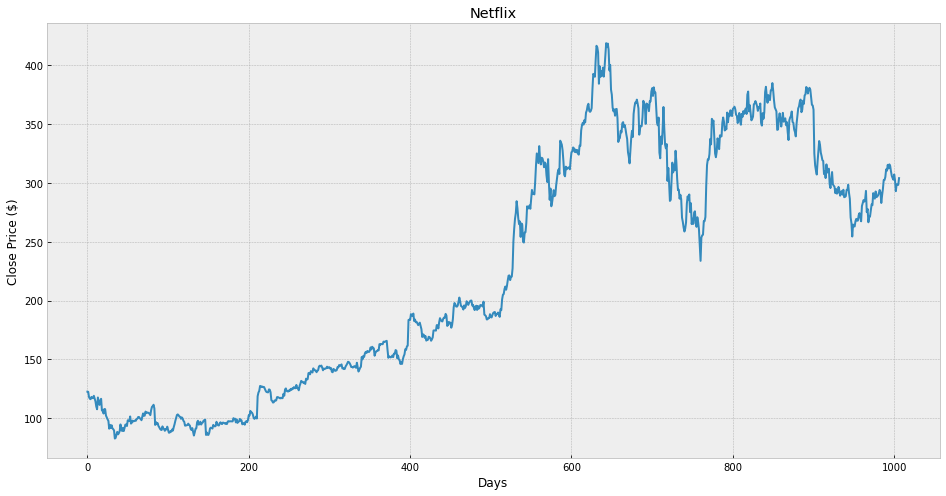

In [6]:
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.plot(df['Close'])
plt.show()

In [7]:
df=df[['Close']]
df.head()

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997
4,116.239998


In [9]:
future_days=25
df['Prediction']=df[['Close']].shift(-future_days)
df.tail()


,Close,Prediction
1002,293.119995,NaN
1003,298.929993,NaN
1004,298.440002,NaN
1005,298.500000,NaN
1006,304.209991,NaN


In [10]:
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]
 [114.379997]
 [109.959999]
 [107.660004]
 [117.68    ]
 [114.559998]
 [111.389999]
 [114.970001]
 [116.580002]
 [106.559998]
 [107.059998]
 [104.040001]
 [107.889999]
 [107.739998]
 [102.349998]
 [100.720001]
 [ 99.120003]
 [ 97.830002]
 [ 91.150002]
 [ 94.410004]
 [ 91.839996]
 [ 94.089996]
 [ 91.489998]
 [ 90.739998]
 [ 89.709999]
 [ 82.790001]
 [ 83.32    ]
 [ 86.129997]
 [ 88.449997]
 [ 86.349998]
 [ 87.400002]
 [ 89.050003]
 [ 94.760002]
 [ 90.489998]
 [ 89.230003]
 [ 91.93    ]
 [ 89.120003]
 [ 91.610001]
 [ 94.529999]
 [ 94.790001]
 [ 93.410004]
 [ 98.300003]
 [ 97.610001]
 [ 97.93    ]
 [101.580002]
 [ 95.489998]
 [ 96.230003]
 [ 98.      ]
 [ 97.360001]
 [ 97.660004]
 [ 98.129997]
 [ 97.860001]
 [ 99.349998]
 [ 99.720001]
 [101.120003]
 [101.059998]
 [ 99.839996]
 [ 99.589996]
 [ 98.360001]
 [101.209999]
 [104.129997]
 [102.190002]
 [102.

In [11]:
y=np.array(df['Prediction'])[:-future_days]
print(y)

[ 99.120003  97.830002  91.150002  94.410004  91.839996  94.089996
  91.489998  90.739998  89.709999  82.790001  83.32      86.129997
  88.449997  86.349998  87.400002  89.050003  94.760002  90.489998
  89.230003  91.93      89.120003  91.610001  94.529999  94.790001
  93.410004  98.300003  97.610001  97.93     101.580002  95.489998
  96.230003  98.        97.360001  97.660004  98.129997  97.860001
  99.349998  99.720001 101.120003 101.059998  99.839996  99.589996
  98.360001 101.209999 104.129997 102.190002 102.230003 105.699997
 104.349998 104.940002 104.830002 104.449997 103.809998 102.68
 106.980003 109.650002 110.419998 111.510002 108.400002  94.339996
  96.769997  94.980003  95.900002  93.559998  92.43      91.040001
  90.279999  90.029999  93.110001  91.540001  90.790001  89.370003
  90.839996  90.540001  92.889999  90.019997  87.739998  87.879997
  89.120003  88.629997  90.5       89.550003  92.489998  94.889999
  97.889999 100.199997 102.809998 103.300003 102.57     101.510002

In [12]:
x_train,y_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [13]:
tree=DecisionTreeRegressor().fit(x_train,y_train)
lr=LinearRegression().fit(x_train,y_train)

In [14]:
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[274.459991],
       [270.720001],
       [267.529999],
       [280.480011],
       [282.929993],
       [285.529999],
       [284.25    ],
       [286.279999],
       [293.350006],
       [275.299988],
       [278.049988],
       [266.690002],
       [271.269989],
       [271.5     ],
       [276.820007],
       [281.859985],
       [281.209991],
       [291.450012],
       [287.410004],
       [286.809998],
       [292.859985],
       [288.029999],
       [288.589996],
       [289.570007],
       [291.570007]])

In [15]:
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction=lr.predict(x_future)
print(lr_prediction)


[294.179993 276.820007 292.859985 289.619995 315.339996 302.570007
 302.600006 305.160004 280.480011 310.480011 315.549988 312.48999
 315.929993 314.660004 325.160004 306.160004 285.769989 302.859985
 284.25     302.5      293.119995 298.929993 320.269989 270.720001
 304.209991]

[276.46360558 272.91516721 269.88854803 282.1752973  284.4997982
 286.9666393  285.7521982  287.67822644 294.38612782 277.26058032
 279.86973316 269.09157328 273.43698639 273.65521688 278.70274828
 283.48459296 282.86788981 292.5834461  288.7503558  288.1810804
 293.9212043  289.33859642 289.86991197 290.7997296  292.6972953 ]


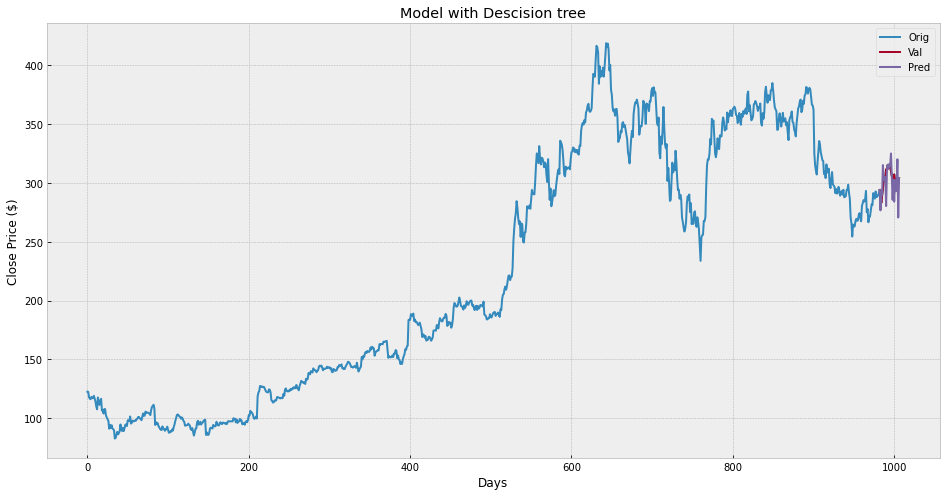

In [17]:
predictions=tree_prediction
valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model with Descision tree')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

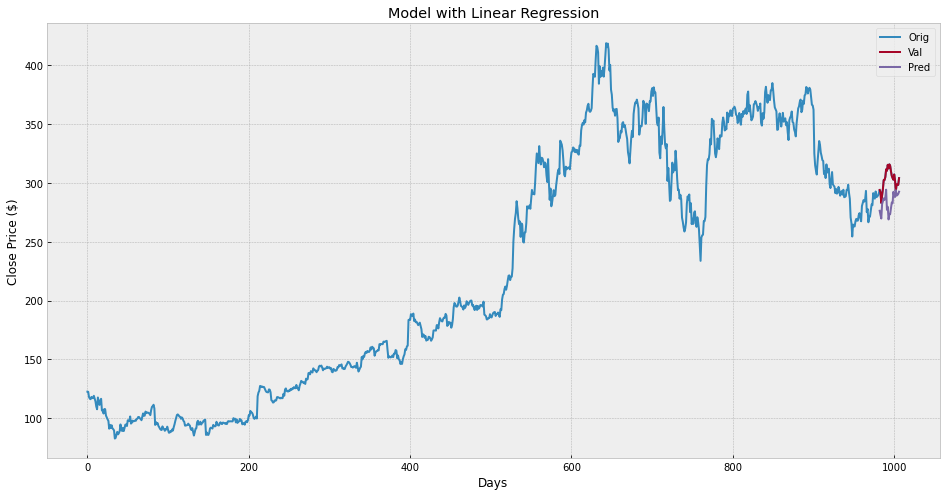

In [18]:
predictions=lr_prediction
valid=df[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model with Linear Regression')
plt.xlabel('Days')
plt.ylabel('Close Price ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()